# Probability

Probability is a flexible language for reasoning about our level of certainty, and it can be applied effectively in a broad set of contexts.

## Basic Probability Theory

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

The distribution that assigns probabilities to a number of discrete choices is called the multinomial distribution.

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 5., 3., 1., 0., 1.])

In [4]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1500, 0.1700, 0.1670, 0.1640, 0.1720, 0.1770])

The true probability is $\frac{1}{6}$, roughly $0.167$.

Let us conduct 500 groups of experiments where each group draws 10 samples.

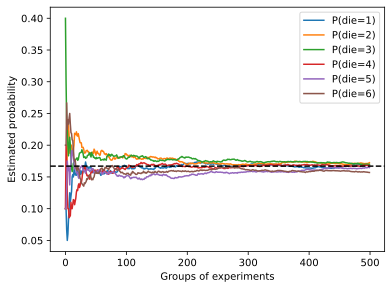

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### Axioms of Probability Theory

The probability of an event $\mathcal{A}$ in the given sample space $\mathcal{S}$,
denoted as $P(\mathcal{A})$, satisfies the following properties:

* For any event $\mathcal{A}$, its probability is never negative, i.e., $P(\mathcal{A}) \geq 0$;
* Probability of the entire sample space is $1$, i.e., $P(\mathcal{S}) = 1$;
* For any countable sequence of events $\mathcal{A}_1, \mathcal{A}_2, \ldots$ that are *mutually exclusive* ($\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$ for all $i \neq j$), the probability that any happens is equal to the sum of their individual probabilities, i.e., $P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$.

These are also the axioms of probability theory, proposed by Kolmogorov in 1933.
Thanks to this axiom system, we can avoid any philosophical dispute on randomness; instead, we can reason rigorously with a mathematical language.
For instance, by letting event $\mathcal{A}_1$ be the entire sample space and $\mathcal{A}_i = \emptyset$ for all $i > 1$, we can prove that $P(\emptyset) = 0$, i.e., the probability of an impossible event is $0$.

### Random Variables

A random variable can be pretty much any quantity and is not deterministic.

- $P(X)$ as the *distribution* over the random variable $X$: the distribution tells us the probability that $X$ takes any value.
- $P(a)$ to denote the probability that a random variable takes the value $a$.
- $P(1 \leq X \leq 3)$ denotes the probability of the event $\{1 \leq X \leq 3\}$, which means $\{X = 1, 2, \text{or}, 3\}$. Equivalently, $P(1 \leq X \leq 3)$ represents the probability that the random variable $X$ can take a value from $\{1, 2, 3\}$.

Note that there is a subtle difference between *discrete* random variables, like the sides of a die, and *continuous* ones, like the weight and the height of a person.

- The height of exactly 1.80 meters has no probability, but nonzero density. In the interval between any two different heights we have nonzero probability.

## Dealing with Multiple Random Variables

### Joint Probability

*joint probability* $P(A = a, B=b)$.

- $P(A=a, B=b) \leq P(A=a)$

### Conditional Probability

*conditional probability* $P(B=b \mid A=a)$: it is the probability of $B=b$, provided that
$A=a$ has occurred.

- $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$

### Bayes' theorem

By construction, we have the *multiplication rule* that $P(A, B) = P(B \mid A) P(A)$. By symmetry, this also holds for $P(A, B) = P(A \mid B) P(B)$. Assume that $P(B) > 0$. Solving for one of the conditional variables we get

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

Note that here we use the more compact notation where $P(A, B)$ is a *joint distribution* and $P(A \mid B)$ is a *conditional distribution*. Such distributions can be evaluated for particular values $A = a, B=b$.

### Marginalization

*marginalization* is the operation of determining $P(B)$ from $P(A, B)$.

$$P(B) = \sum_{A} P(A, B),$$

which is also known as the *sum rule*. The probability or distribution as a result of marginalization is called a *marginal probability* or a *marginal distribution*.

### Independence

Two random variables $A$ and $B$ being independent
means that the occurrence of one event of $A$
does not reveal any information about the occurrence of an event of $B$.
In this case $P(B \mid A) = P(B)$. Statisticians typically express this as $A \perp  B$. From Bayes' theorem, it follows immediately that also $P(A \mid B) = P(A)$.
In all the other cases we call $A$ and $B$ dependent.

Since $P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ is equivalent to $P(A, B) = P(A)P(B)$, two random variables are independent if and only if their joint distribution is the product of their individual distributions.
Likewise, two random variables $A$ and $B$ are *conditionally independent* given another random variable $C$
if and only if $P(A, B \mid C) = P(A \mid C)P(B \mid C)$. This is expressed as $A \perp B \mid C$.

### Application

## Expectation and Variance

To summarize key characteristics of probability distributions,
we need some measures.
The *expectation* (or average) of the random variable $X$ is denoted as

$$E[X] = \sum_{x} x P(X = x).$$

When the input of a function $f(x)$ is a random variable drawn from the distribution $P$ with different values $x$,
the expectation of $f(x)$ is computed as

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$


In many cases we want to measure by how much the random variable $X$ deviates from its expectation. This can be quantified by the variance

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

Its square root is called the *standard deviation*.
The variance of a function of a random variable measures
by how much the function deviates from the expectation of the function,
as different values $x$ of the random variable are sampled from its distribution:

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$

## Summary

* We can sample from probability distributions.
* We can analyze multiple random variables using joint distribution, conditional distribution, Bayes' theorem, marginalization, and independence assumptions.
* Expectation and variance offer useful measures to summarize key characteristics of probability distributions.

## Exercises

1. We conducted $m=500$ groups of experiments where each group draws $n=10$ samples. Vary $m$ and $n$. Observe and analyze the experimental results.

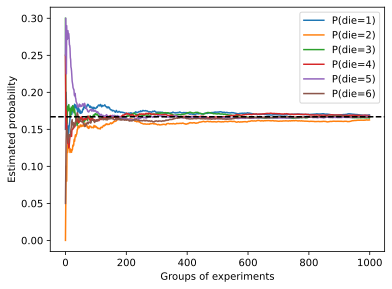

In [6]:
def experimental(m, n):
    counts = multinomial.Multinomial(n, fair_probs).sample((m,))
    cum_counts = counts.cumsum(dim=0)
    estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

    d2l.set_figsize((6, 4.5))
    for i in range(6):
        d2l.plt.plot(estimates[:, i].numpy(),
                     label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    d2l.plt.legend();
experimental(1000, 20)

2. Given two events with probability $P(\mathcal{A})$ and $P(\mathcal{B})$, compute upper and lower bounds on $P(\mathcal{A} \cup \mathcal{B})$ and $P(\mathcal{A} \cap \mathcal{B})$. (Hint: display the situation using a [Venn Diagram](https://en.wikipedia.org/wiki/Venn_diagram).)

- $Max(P(\mathcal{A}),P(\mathcal{B}))$ <= $P(\mathcal{A} \cup \mathcal{B})$ <= $P(\mathcal{A})+P(\mathcal{B})$
- 0 <= $P(\mathcal{A} \cap \mathcal{B})$ <= $Min(P(\mathcal{A}),P(\mathcal{B}))$

3. Assume that we have a sequence of random variables, say $A$, $B$, and $C$, where $B$ only depends on $A$, and $C$ only depends on $B$, can you simplify the joint probability $P(A, B, C)$? (Hint: this is a [Markov Chain](https://en.wikipedia.org/wiki/Markov_chain).)

- $B \perp C$, $P(B, C) = P(B)P(C)$
- $A \perp C$, $P(A, C) = P(A)P(C)$
- $P(A, B, C) = P(A | B, C)P(B, C) = P(B | A, C)P(A, C)$

4. In`Section 1.2.6`, the first test is more accurate. Why not run the first test twice rather than run both the first and second tests?